U.S House Price Prediction

In [145]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [146]:
# Loading dataset
df = pd.read_csv('U.S House Price prediction_Dataset.csv', encoding = 'unicode_escape', skipinitialspace = True)
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA


In [147]:
# statistics of dataset
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [148]:
# basic information of dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [149]:
# check null 
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [150]:
# Drop unnecessary column
df = df.drop(['date', 'country', 'statezip', 'street'], axis = 1)

In [151]:
# Handle category varialbe
df = pd.get_dummies(df, columns = ['city'])
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,0,0,1,0,0,0,0,0,0,0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,0,1,0,0,0,0,0,0,0,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'sqft_basement')

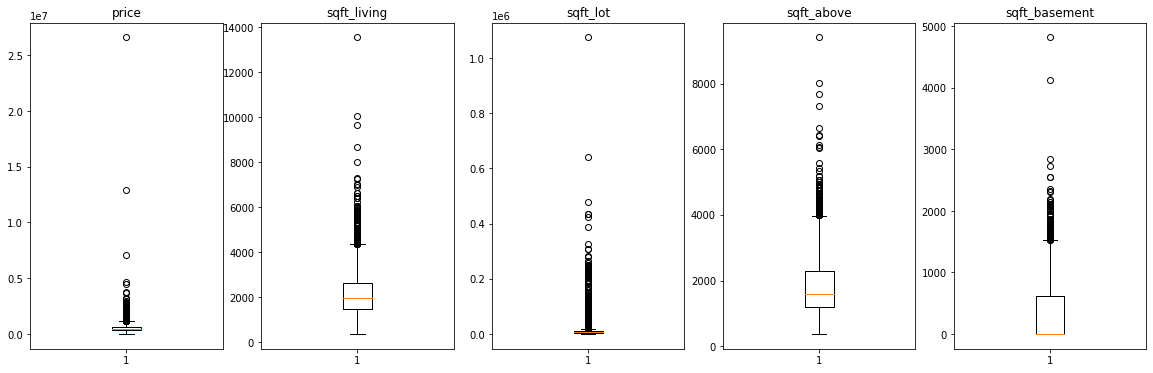

In [152]:
# plot to see outlier
fig = plt.figure(figsize = (20, 6))
ax1 = plt.subplot2grid((1,5), (0,0))
ax2 = plt.subplot2grid((1,5), (0,1))
ax3 = plt.subplot2grid((1,5), (0,2))
ax4 = plt.subplot2grid((1,5), (0,3))
ax5 = plt.subplot2grid((1,5), (0,4))

ax1.boxplot(df['price'])
ax1.set_title("price")  

ax2.boxplot(df['sqft_living'])
ax2.set_title("sqft_living")

ax3.boxplot(df['sqft_lot'])
ax3.set_title("sqft_lot")

ax4.boxplot(df['sqft_above'])
ax4.set_title("sqft_above")  

ax5.boxplot(df['sqft_basement'])
ax5.set_title("sqft_basement")

In [153]:
# Function to remove outlier 
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [154]:
# remove outlier
df = remove_outlier(df, 'price')
df = remove_outlier(df, 'sqft_living')
df = remove_outlier(df, 'sqft_lot')
df = remove_outlier(df, 'sqft_above')
df = remove_outlier(df, 'sqft_basement')

len(df)

3685

In [155]:
# independent 
X = df.drop('price', axis = 1).values

# y prediction (target varaible) 
y = df['price'].values

### 1. Linear Regression

In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [157]:
# Creating the machine learning model
from sklearn.linear_model import LinearRegression
linearmodel = LinearRegression()
linearmodel.fit(X_train, y_train) 

print('R Square of train\t\t:', round(linearmodel.score(X_train, y_train), 3))
print('Adjusted R Square of train\t:', round(1 - (1-linearmodel.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1), 3))

print('R Square of test\t\t:', round(linearmodel.score(X_test, y_test), 3))
print('Adjusted R Square of test\t:', round(1 - (1-linearmodel.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1), 3))

R Square of train		: 0.636
Adjusted R Square of train	: 0.629
R Square of test		: 0.656
Adjusted R Square of test	: 0.628


In [158]:
lr_y_pred = linearmodel.predict(X_test)

In [159]:
mse = mean_squared_error(y_test, lr_y_pred)
rmse = mse**.5

print('Mean square error\t:', round(mse, 2))
print('Root mean square erro\t:', round(rmse, 2))

Mean square error	: 13911721046.7
Root mean square erro	: 117947.96


In [160]:
# Compare actual & predicted value 
df_lr = pd.DataFrame({'actual': y_test, 'predicted': lr_y_pred, 'difference': y_test-lr_y_pred})
df_lr.head()

,actual,predicted,difference
0,538000.0,496764.853154,41235.146846
1,620000.0,447160.764087,172839.235913
2,346150.0,378060.744618,-31910.744618
3,425000.0,625582.536685,-200582.536685
4,476000.0,645767.820188,-169767.820188


<AxesSubplot:xlabel='actual', ylabel='predicted'>

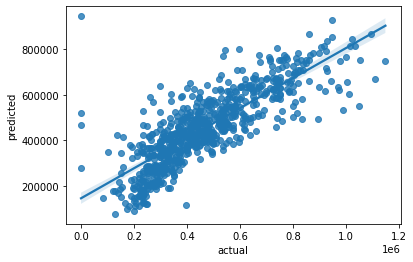

In [161]:
# Visualization of actual vs predict 
sns.regplot(df_lr['actual'], df_lr['predicted'])

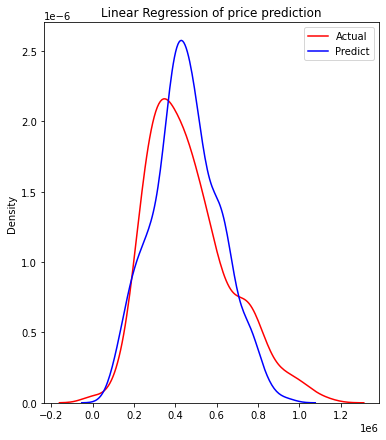

In [162]:
# Visualization of actual vs predict  
plt.figure(figsize = (6, 7))
ax1 = sns.distplot(y_test, hist = False, color = "r", label = "Actual")
sns.distplot(lr_y_pred, hist = False, color = "b", label = "Predict", ax = ax1)
plt.title('Linear Regression of price prediction')
ax1.legend()
plt.show()

### 2. Random Forest Regression

In [163]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state = 1)
rf_model.fit(X_train, y_train)

print('R Square of train\t\t:', round(rf_model.score(X_train, y_train), 3))
print('Adjusted R Square of train\t:', round(1 - (1-rf_model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1), 3))

print('R Square of test\t\t:', round(rf_model.score(X_test, y_test), 3))
print('Adjusted R Square of test\t:', round(1 - (1-rf_model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1), 3))

R Square of train		: 0.947
Adjusted R Square of train	: 0.946
R Square of test		: 0.634
Adjusted R Square of test	: 0.604


In [164]:
rf_y_pred = rf_model.predict(X_test)

In [165]:
mse = mean_squared_error(y_test, rf_y_pred)
rmse = mse**.5

print('Mean square error\t:', round(mse, 2))
print('Root mean square erro\t:', round(rmse, 2))

Mean square error	: 14792508228.36
Root mean square erro	: 121624.46


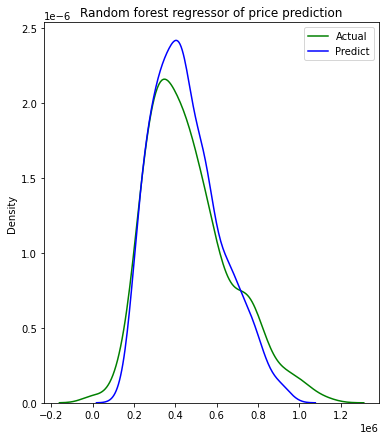

In [166]:
# Visualization of actual vs predict 
plt.figure(figsize = (6, 7))
ax1 = sns.distplot(y_test, hist = False, color = "g", label = "Actual")
sns.distplot(rf_y_pred, hist = False, color = "b", label = "Predict", ax = ax1)
plt.title('Random forest regressor of price prediction')
ax1.legend()

### 3. XGB Regressor

In [167]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(learning_rate = 0.03, n_estimators = 200, objective = 'reg:squarederror')
xgb_model.fit(X_train, y_train)

print('R Square of train\t\t:', round(xgb_model.score(X_train, y_train), 3))
print('Adjusted R Square of train\t:', round(1 - (1-xgb_model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1), 3))

print('R Square of test\t\t:', round(xgb_model.score(X_test, y_test), 3))
print('Adjusted R Square of test\t:', round(1 - (1-xgb_model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1), 3))

R Square of train		: 0.811
Adjusted R Square of train	: 0.807
R Square of test		: 0.647
Adjusted R Square of test	: 0.618


In [168]:
xgb_y_pred = xgb_model.predict(X_test)

In [169]:
mse = mean_squared_error(y_test, xgb_y_pred)
rmse = mse**.5

print('Mean square error\t:', round(mse, 2))
print('Root mean square erro\t:', round(rmse, 2))

Mean square error	: 14290511542.69
Root mean square erro	: 119542.93


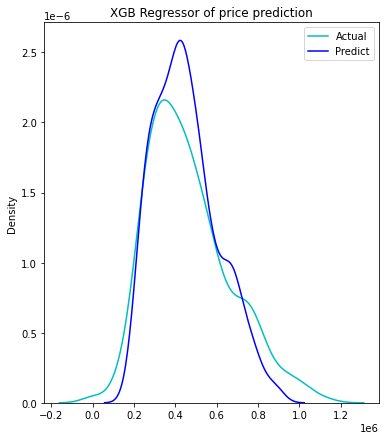

In [170]:
# visualization of actual and predict 
plt.figure(figsize = (6, 7))
ax1 = sns.distplot(y_test, hist = False, color = "c", label = "Actual")
sns.distplot(xgb_y_pred, hist = False, color = "b", label = "Predict", ax = ax1)
plt.title('XGB Regressor of price prediction')
ax1.legend()

In [171]:
# Compare actual value with prediction value
df_comparison = pd.DataFrame({'actual': y_test, 
                              'linear regression pred': lr_y_pred, 
                              'random forest pred': rf_y_pred, 
                              'xgb regressor pred': xgb_y_pred})
df_comparison.head()

,actual,linear regression pred,random forest pred,xgb regressor pred
0,538000.0,496764.853154,552066.252747,498760.59375
1,620000.0,447160.764087,401395.219048,403915.81250
2,346150.0,378060.744618,342743.193929,388225.25000
3,425000.0,625582.536685,734762.775000,663050.06250
4,476000.0,645767.820188,675565.112619,656446.68750


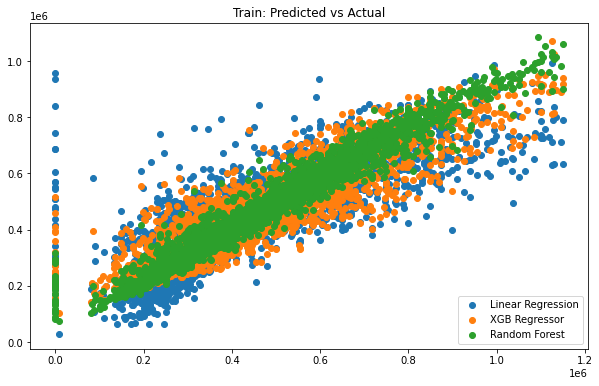

In [172]:
# Model comparison: Train set
plt.figure(figsize = (10, 6))
plt.title('Train: Predicted vs Actual')
plt.scatter(y_train, linearmodel.predict(X_train), label = 'Linear Regression')
plt.scatter(y_train, xgb_model.predict(X_train), label = 'XGB Regressor')
plt.scatter(y_train, rf_model.predict(X_train), label = 'Random Forest')

plt.legend()

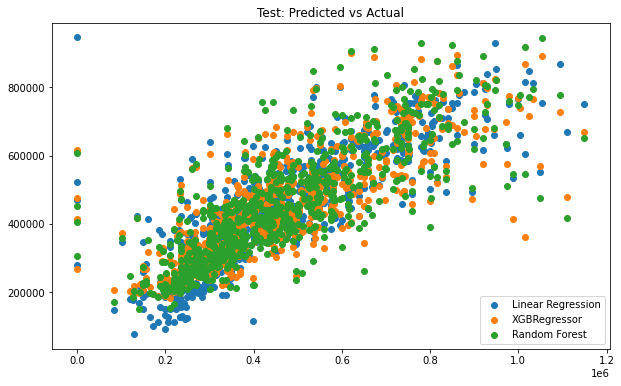

In [173]:
# Model comparison: Test set
plt.figure(figsize = (10, 6))
plt.title('Test: Predicted vs Actual')
plt.scatter(y_test, linearmodel.predict(X_test), label = 'Linear Regression')
plt.scatter(y_test, xgb_model.predict(X_test), label = 'XGBRegressor')
plt.scatter(y_test, rf_model.predict(X_test), label = 'Random Forest')

plt.legend()

## Conclusion
- Random forest     R2: 0.947
- XGB regressor     R2: 0.810
- Linear regression R2: 0.635
##### Based on the graph & R-Square, we can see that random forest model has better performent more than other model. Thus, random forest is recommeded to  use for this case. 